In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy 
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [92]:
data = pd.read_excel("dataset.xlsx")#read data with pandas library
data = data.dropna(axis=1, how = "all")
data = data.dropna(axis=0, how = "all")
data.set_index("Name",inplace=True)


In [93]:
data.head(n=3)#First 3 samples of the our dataset:

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


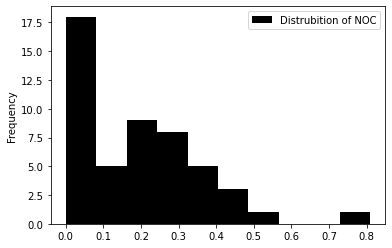

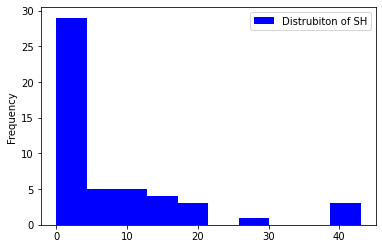

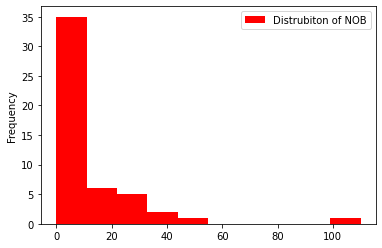

In [94]:
#show the distribution of 3 metrics

def plotHist():
    
    plt.hist(data["NOC"],color="black",label= "Distrubition of NOC")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    plt.hist(data["SH"],color = "blue",label = "Distrubiton of SH")
    plt.legend()
    plt.ylabel("Frequency")
    plt.show()
    plt.hist(data["NOB"],color ="red",label ="Distrubiton of NOB")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
    
plotHist()


In [95]:
#Min max scaler for all data                                   
a = MinMaxScaler().fit_transform(data)
minMax = pd.DataFrame(data = a )
minMax.columns = data.columns
minMax.index = data.index

minMax

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Name,,,,,,,,,,,,,,,,
Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359


# Part1 (Statistical Correlation Analysis)

In [96]:
#Show the correlation matrix of all metrics
corr = data.corr(method="spearman")
corr


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [97]:
#P values of Spearman Correlation Table
coef , pvals = scipy.stats.spearmanr(data)
pvals = np.around(pvals,4)
np.fill_diagonal(pvals,1)
pvals = pd.DataFrame(pvals)
pvals.head(n=16)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
1,0.0000,1.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
2,0.0000,0.0000,1.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
4,0.0076,0.0486,0.0058,0.0000,1.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
5,0.3558,0.0364,0.8548,0.1756,0.9264,1.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
6,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,1.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
7,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,1.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
8,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,1.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
9,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,1.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


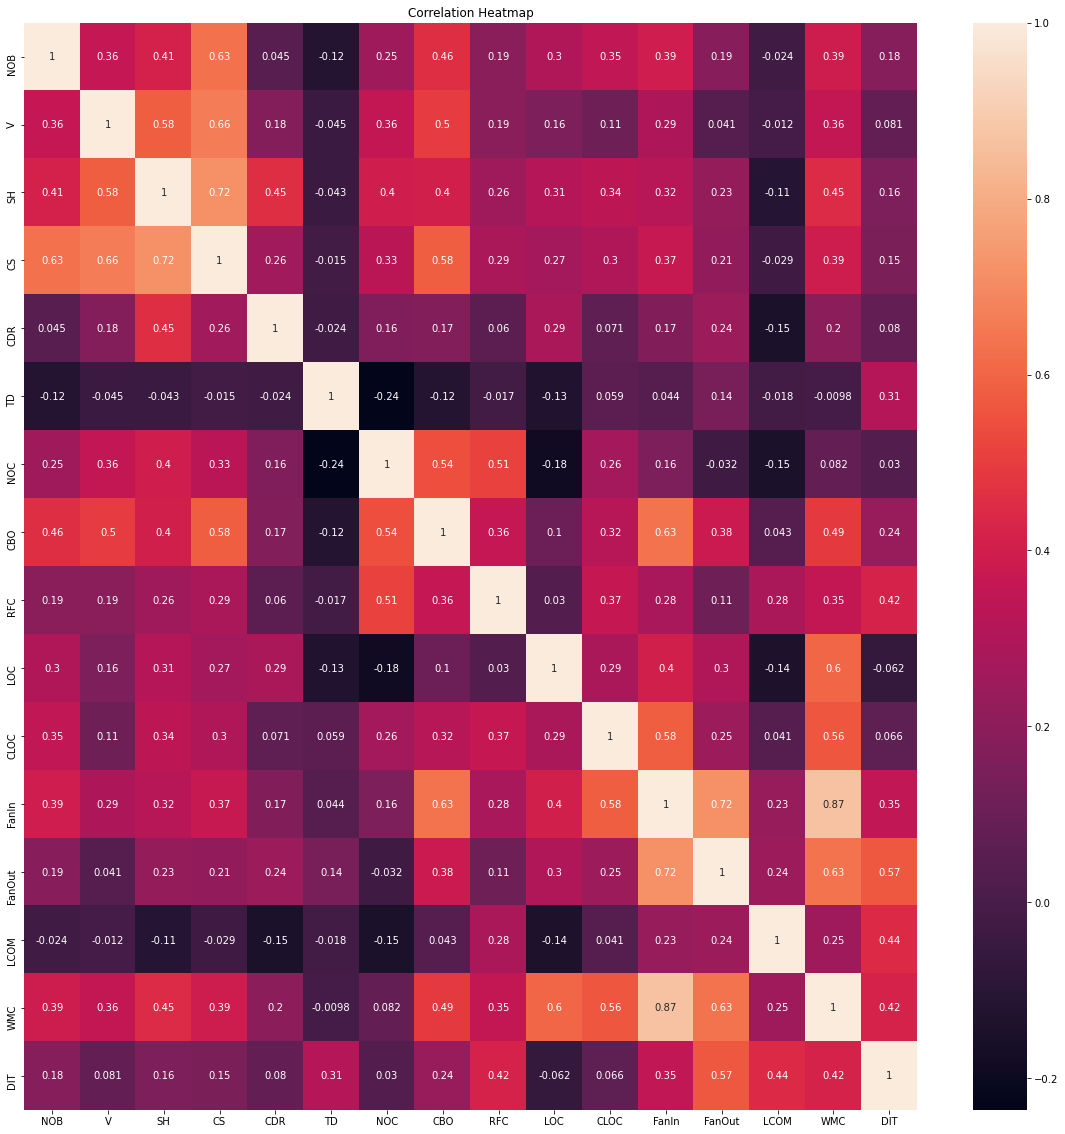

In [98]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(20,20))
heatmap = sb.heatmap(data.corr(),annot = True)       
heatmap.set_title('Correlation Heatmap');
plt.show()

In [99]:
#Correlation between External Metrics & TD
TdExternal = corr.iloc[0:6,0:6]
TdExternal.head(n = 16)
#TdExternal=data.iloc[0:6,0:6]
#TdExternal.corr().head(n=6)

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [100]:
#Correlation between Internal Metrics & TD
corr1 = corr.drop(['NOB',"V","SH","CS"])
corr1 = corr1.drop(['NOB',"V","SH","CS"],axis=1)
corr1.head(n=20)






,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import tree


random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regression_style,y_name,x_name):
    plt.figure(figsize = (8,8))
    plt.title(regression_style)
    plt.scatter(y_test,y_test,label="Original values",c="green")
    plt.scatter(y_test,y_pred,label="Predicted values",c="red")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()
    
    


#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(x_train,y_train,x_test,y_test,name):

    model = LinearRegression()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print("Root mean squared error : ....",mean_squared_error(y_test,prediction))
    print("R squared value : ...." ,r2_score(y_test,prediction))
    
    plotGraph(y_test,prediction,"-- linear regression -- " ,name[0],name[1])
     


#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(x_train,y_train,x_test,y_test,name):
    model = SVR()
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print("Root mean squared error : ....",mean_squared_error(y_test,prediction))
    print("R squared value : ...." ,r2_score(y_test,prediction))
    
    plotGraph(y_test,prediction,"-- SVR regression -- " ,name[0],name[1])
     




def decisionTreeRegression(X_train,y_train,X_test,y_test,name):
   
    model = DecisionTreeRegressor(random_state=random_state_fixed)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print("Root mean squared error : ....",mean_squared_error(y_test,prediction))
    print("R squared value : ...." ,r2_score(y_test,prediction))
    
    plotGraph(y_test,prediction,"-- Decission tree regression -- " ,name[0],name[1])
   

def randomDecTreeRegression(x_train,y_train,x_test,y_test,name):
    
    model = RandomForestRegressor(random_state=random_state_fixed)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print("Root mean squared error : ....",mean_squared_error(y_test,prediction))
    print("R squared value : ...." ,r2_score(y_test,prediction))
    
    plotGraph(y_test,prediction,"-- Random forest regression -- " ,name[0],name[1])





#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(x_train,y_train,x_test,y_test,name):
   
    model = MLPRegressor(random_state=random_state_fixed)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    
    print("Root mean squared error : ....",mean_squared_error(y_test,prediction))
    print("R squared value : ...." ,r2_score(y_test,prediction))
    
    plotGraph(y_test,prediction,"-- Multi Layer Perceptron regression -- " ,name[0],name[1])




        

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [102]:
#split data into train and test data
x = minMax.drop(["CS","NOB","V","SH","TD","CDR"],axis = 1)
y= minMax["TD"]
y1=minMax["CDR"]
#y = td  y1 = cdr
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = random_state_fixed)
x_train , x_test ,y1_train ,y1_test = train_test_split(x,y1,test_size = 0.30,random_state = random_state_fixed)

Root mean squared error : .... 0.07025896527425134
R squared value : .... -0.172967530469208


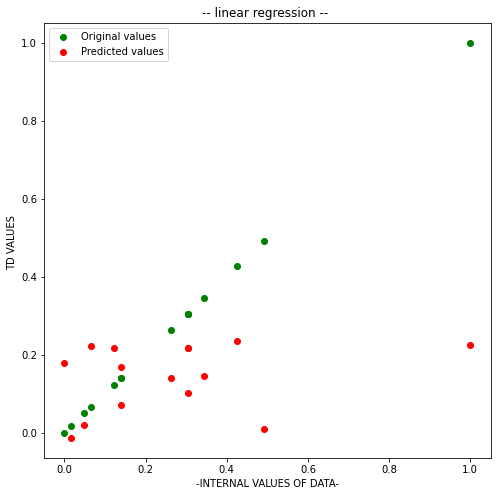

Root mean squared error : .... 0.07968314726987583
R squared value : .... -0.253539369006031


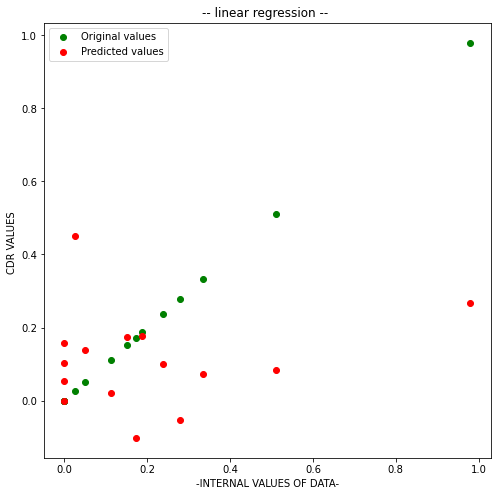

In [103]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-INTERNAL VALUES OF DATA-"])
linearRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-INTERNAL VALUES OF DATA-"])

Root mean squared error : .... 0.06448590031364049
R squared value : .... -0.07658669531666251


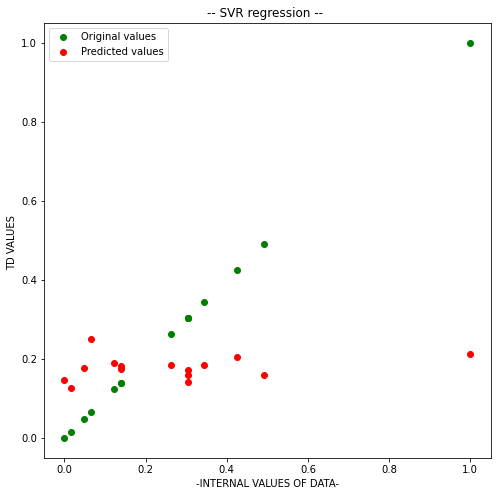

Root mean squared error : .... 0.07402681001404916
R squared value : .... -0.16455641994479597


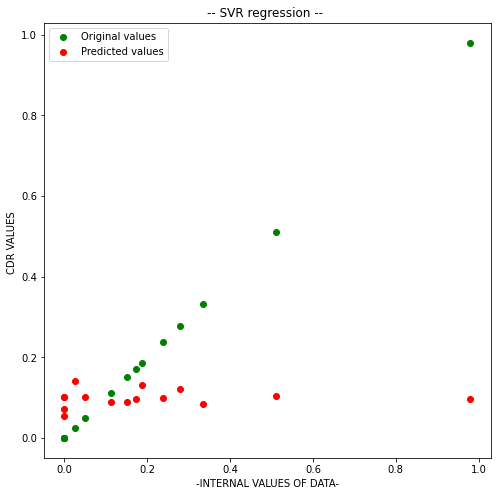

In [104]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-INTERNAL VALUES OF DATA-"])
svrRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-INTERNAL VALUES OF DATA-"])

Root mean squared error : .... 0.09107318821105438
R squared value : .... -0.5204592360688753


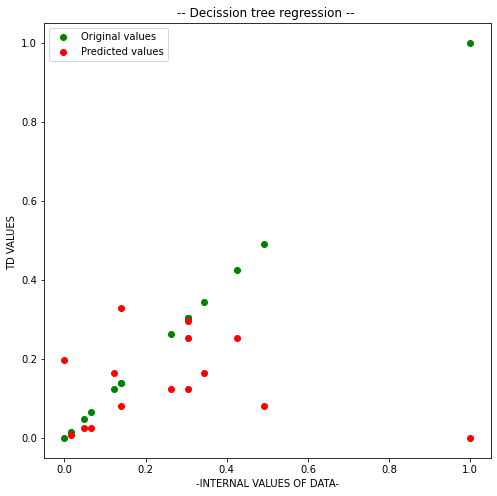

Root mean squared error : .... 0.07129034452266773
R squared value : .... -0.12150757783825572


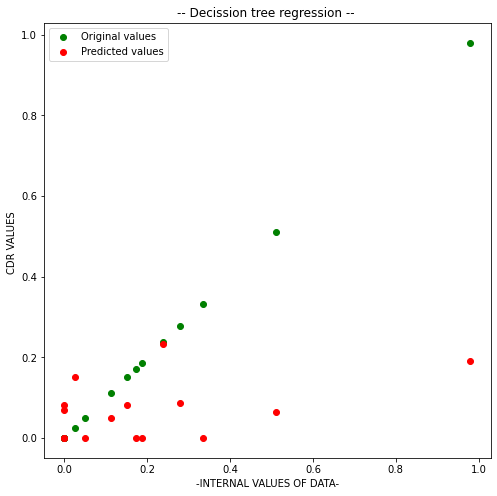

In [105]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-INTERNAL VALUES OF DATA-"])
decisionTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-INTERNAL VALUES OF DATA-"])

Root mean squared error : .... 0.07006311744154797
R squared value : .... -0.16969786733401793


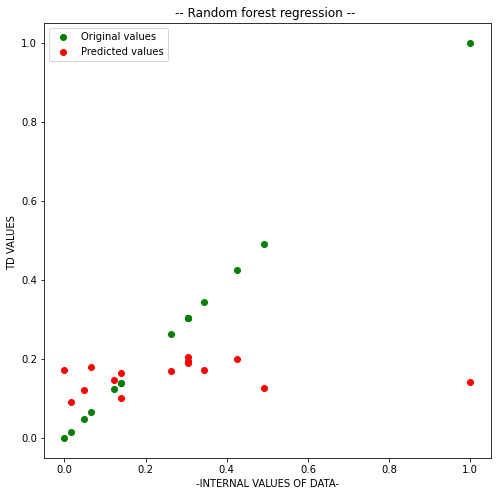

Root mean squared error : .... 0.06680948848756928
R squared value : .... -0.05101676969007363


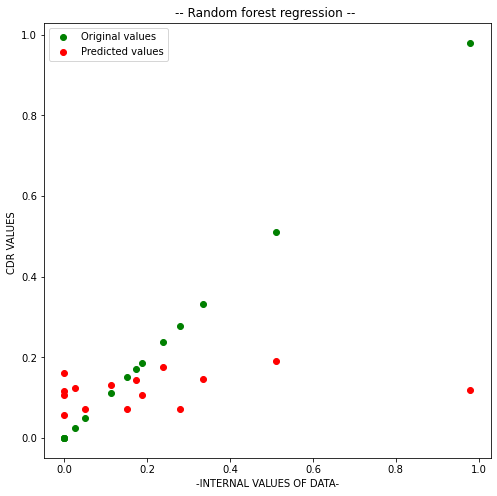

In [106]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-INTERNAL VALUES OF DATA-"])
randomDecTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-INTERNAL VALUES OF DATA-"])

Root mean squared error : .... 0.08907964694702253
R squared value : .... -0.4871772319255996


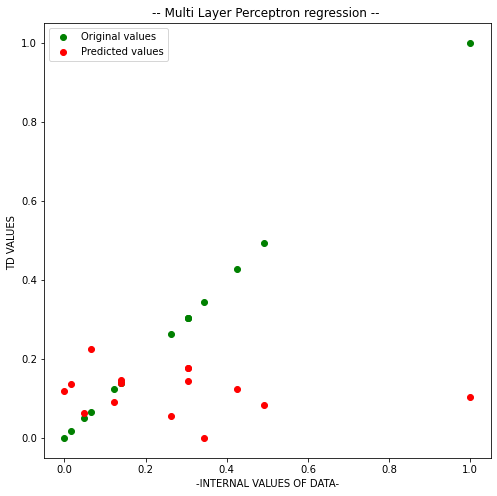

Root mean squared error : .... 0.07782788834127972
R squared value : .... -0.22435327148884165


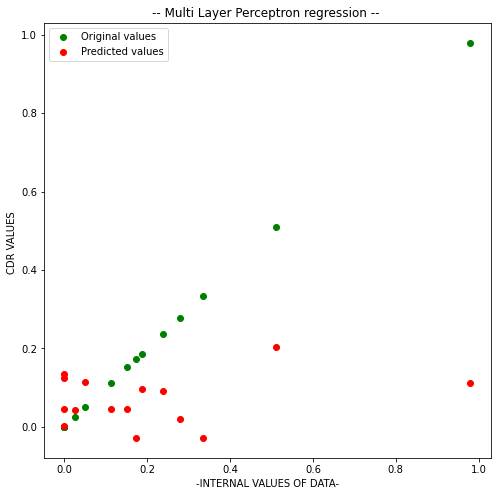

In [107]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_train,x_test,y_test,["TD VALUES ","-INTERNAL VALUES OF DATA-"])
mlpRegressor(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-INTERNAL VALUES OF DATA-"])

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [108]:
#split data into train and test data
x = minMax.drop(["NOC","CBO","LCOM","RFC","FanIn","FanOut","DIT","WMC","CLOC","LOC","TD","CDR"],axis = 1)
y= minMax["TD"]
y1=minMax["CDR"]
#y = td  y1 = cdr
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = random_state_fixed)
x_train , x_test ,y1_train ,y1_test = train_test_split(x,y1,test_size = 0.30,random_state = random_state_fixed)

Root mean squared error : .... 0.0858442680937875
R squared value : .... -0.4331628534217624


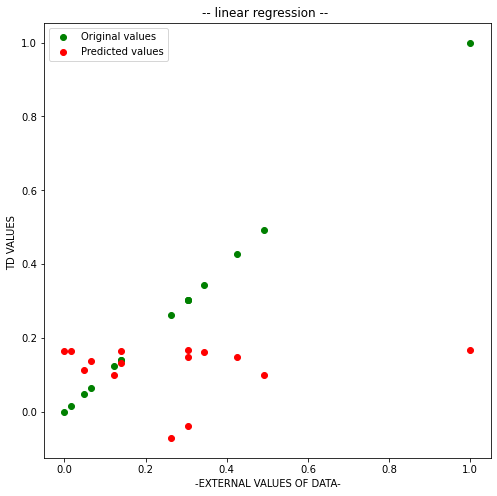

Root mean squared error : .... 0.0825585608183149
R squared value : .... -0.2987740793386182


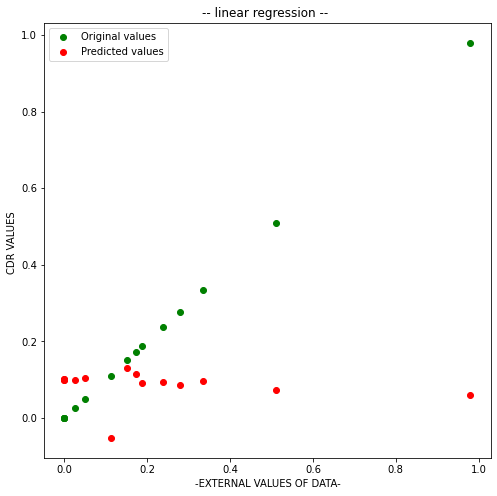

In [109]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL VALUES OF DATA-"])
linearRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL VALUES OF DATA-"])

Root mean squared error : .... 0.08702143250439488
R squared value : .... -0.45281551449179935


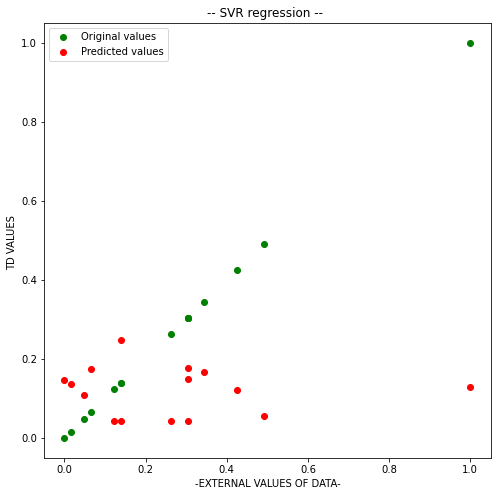

In [ ]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL VALUES OF DATA-"])
svrRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL VALUES OF DATA-"])
decisionTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL VALUES OF DATA-"])
randomDecTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL VALUES OF DATA-"])
mlpRegressor(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL VALUES OF DATA-"])

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [ ]:
#split data into train and test data
x = minMax.drop(["TD","CDR"],axis = 1)
y= minMax["TD"]
y1=minMax["CDR"]
#y = td  y1 = cdr
x_train , x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.30,random_state = random_state_fixed)
x_train , x_test ,y1_train ,y1_test = train_test_split(x,y1,test_size = 0.30,random_state = random_state_fixed)

In [ ]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])
linearRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])

In [ ]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])
svrRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])
decisionTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])
randomDecTreeRegression(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])

In [ ]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_train,x_test,y_test,["TD VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])
mlpRegressor(x_train,y1_train,x_test,y1_test,["CDR VALUES ","-EXTERNAL AND INTERNAL VALUES OF DATA-"])